In [2]:
!mkdir -p ~/ .kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d ninadaithal/chess-pieces-dataset


 83% 7.00M/8.41M [00:01<00:00, 8.13MB/s]

100% 8.41M/8.41M [00:01<00:00, 5.79MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chess-pieces-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
pip install ultralytics



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.4/645.4 kB 9.1 MB/s eta 0:00:00










































In [6]:
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...

remote: Enumerating objects: 18113, done.

remote: Counting objects: 100% (1025/1025), done.

remote: Compressing objects: 100% (627/627), done.

remote: Total 18113 (delta 588), reused 668 (delta 377), pack-reused 17088

Receiving objects: 100% (18113/18113), 9.97 MiB | 10.26 MiB/s, done.

Resolving deltas: 100% (12549/12549), done.


In [7]:
%cat data.yaml

train: ../train/images

val: ../valid/images

test: ../test/images



nc: 12

names: ['black-camel', 'black-elephant', 'black-horse', 'black-king', 'black-pawn', 'black-queen', 'white-camel', 'white-elephant', 'white-horse', 'white-king', 'white-pawn', 'white-queen']



roboflow:

  workspace: tutorial-knlj8

  project: chess-board-detection-uuppk

  version: 4

  license: CC BY 4.0

  url: https://universe.roboflow.com/tutorial-knlj8/chess-board-detection-uuppk/dataset/4

In [8]:
import yaml
with open("/content/data.yaml","r") as stream:
  num_classes = str(yaml.safe_load(stream)["nc"])

In [9]:
num_classes

'12'

In [10]:
from ultralytics import YOLO

#Training for detection on Chess Data using yolov8s.pt

In [11]:
model = YOLO()
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=101 imgsz=416 plots=True


100%|██████████| 6.23M/6.23M [00:00<00:00, 254MB/s]



100% 21.5M/21.5M [00:00<00:00, 375MB/s]

Ultralytics YOLOv8.0.211 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=101, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=tor

Prediction on test Images

In [14]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
model.predict(source = "/content/test/images", show=True, save=True, show_labels=True, show_conf=True, conf=0.5, save_txt=False, save_crop=False, line_width=2)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()





image 1/5 /content/test/images/20230315_193509_jpg.rf.6a788bb87d85fc2661fdec5a6f4c0a6b.jpg: 416x416 2 white-camels, 1 white-elephant, 2 white-horses, 1 white-king, 8 white-pawns, 10.5ms

image 2/5 /content/test/images/20230315_194307_jpg.rf.20dcc57ba2dcfdd1ca6c921cd3fc6c14.jpg: 416x416 2 black-camels, 2 black-elephants, 2 black-horses, 1 black-king, 2 black-pawns, 1 black-queen, 1 white-camel, 2 white-elephants, 2 white-horses, 1 white-king, 2 white-pawns, 11.0ms

image 3/5 /content/test/images/20230315_195331_jpg.rf.d4e8d549a869a7b3cf03aa58b18ecb85.jpg: 416x416 1 black-camel, 2 black-elephants, 2 black-horses, 1 white-camel, 2 white-elephants, 2 white-horses, 10.5ms

image 4/5 /content/test/images/20230315_195425_jpg.rf.ade863ff45e600f66303e669849b0ff9.jpg: 416x416 2 black-camels, 2 black-elephants, 2 black-horses, 1 black-queen, 3 white-camels, 1 white-elephant, 2 white-horses, 1 white-king, 10.4ms

image 5

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'black-camel', 1: 'black-elephant', 2: 'black-horse', 3: 'black-king', 4: 'black-pawn', 5: 'black-queen', 6: 'white-camel', 7: 'white-elephant', 8: 'white-horse', 9: 'white-king', 10: 'white-pawn', 11: 'white-queen'}
 orig_img: array([[[10, 10, 10],
         [10, 10, 10],
         [10, 10, 10],
         ...,
         [21, 19, 19],
         [22, 20, 20],
         [23, 21, 21]],
 
        [[10, 10, 10],
         [10, 10, 10],
         [10, 10, 10],
         ...,
         [20, 18, 18],
         [20, 18, 18],
         [21, 19, 19]],
 
        [[10, 10, 10],
         [10, 10, 10],
         [10, 10, 10],
         ...,
         [21, 19, 19],
         [21, 19, 19],
         [21, 19, 19]],
 
        ...,
 
        [[35, 29, 22],
         [39, 33, 26],
         [40, 34, 27],
         ...,
         [37, 31, 26],
         [31, 25, 20],
         [22

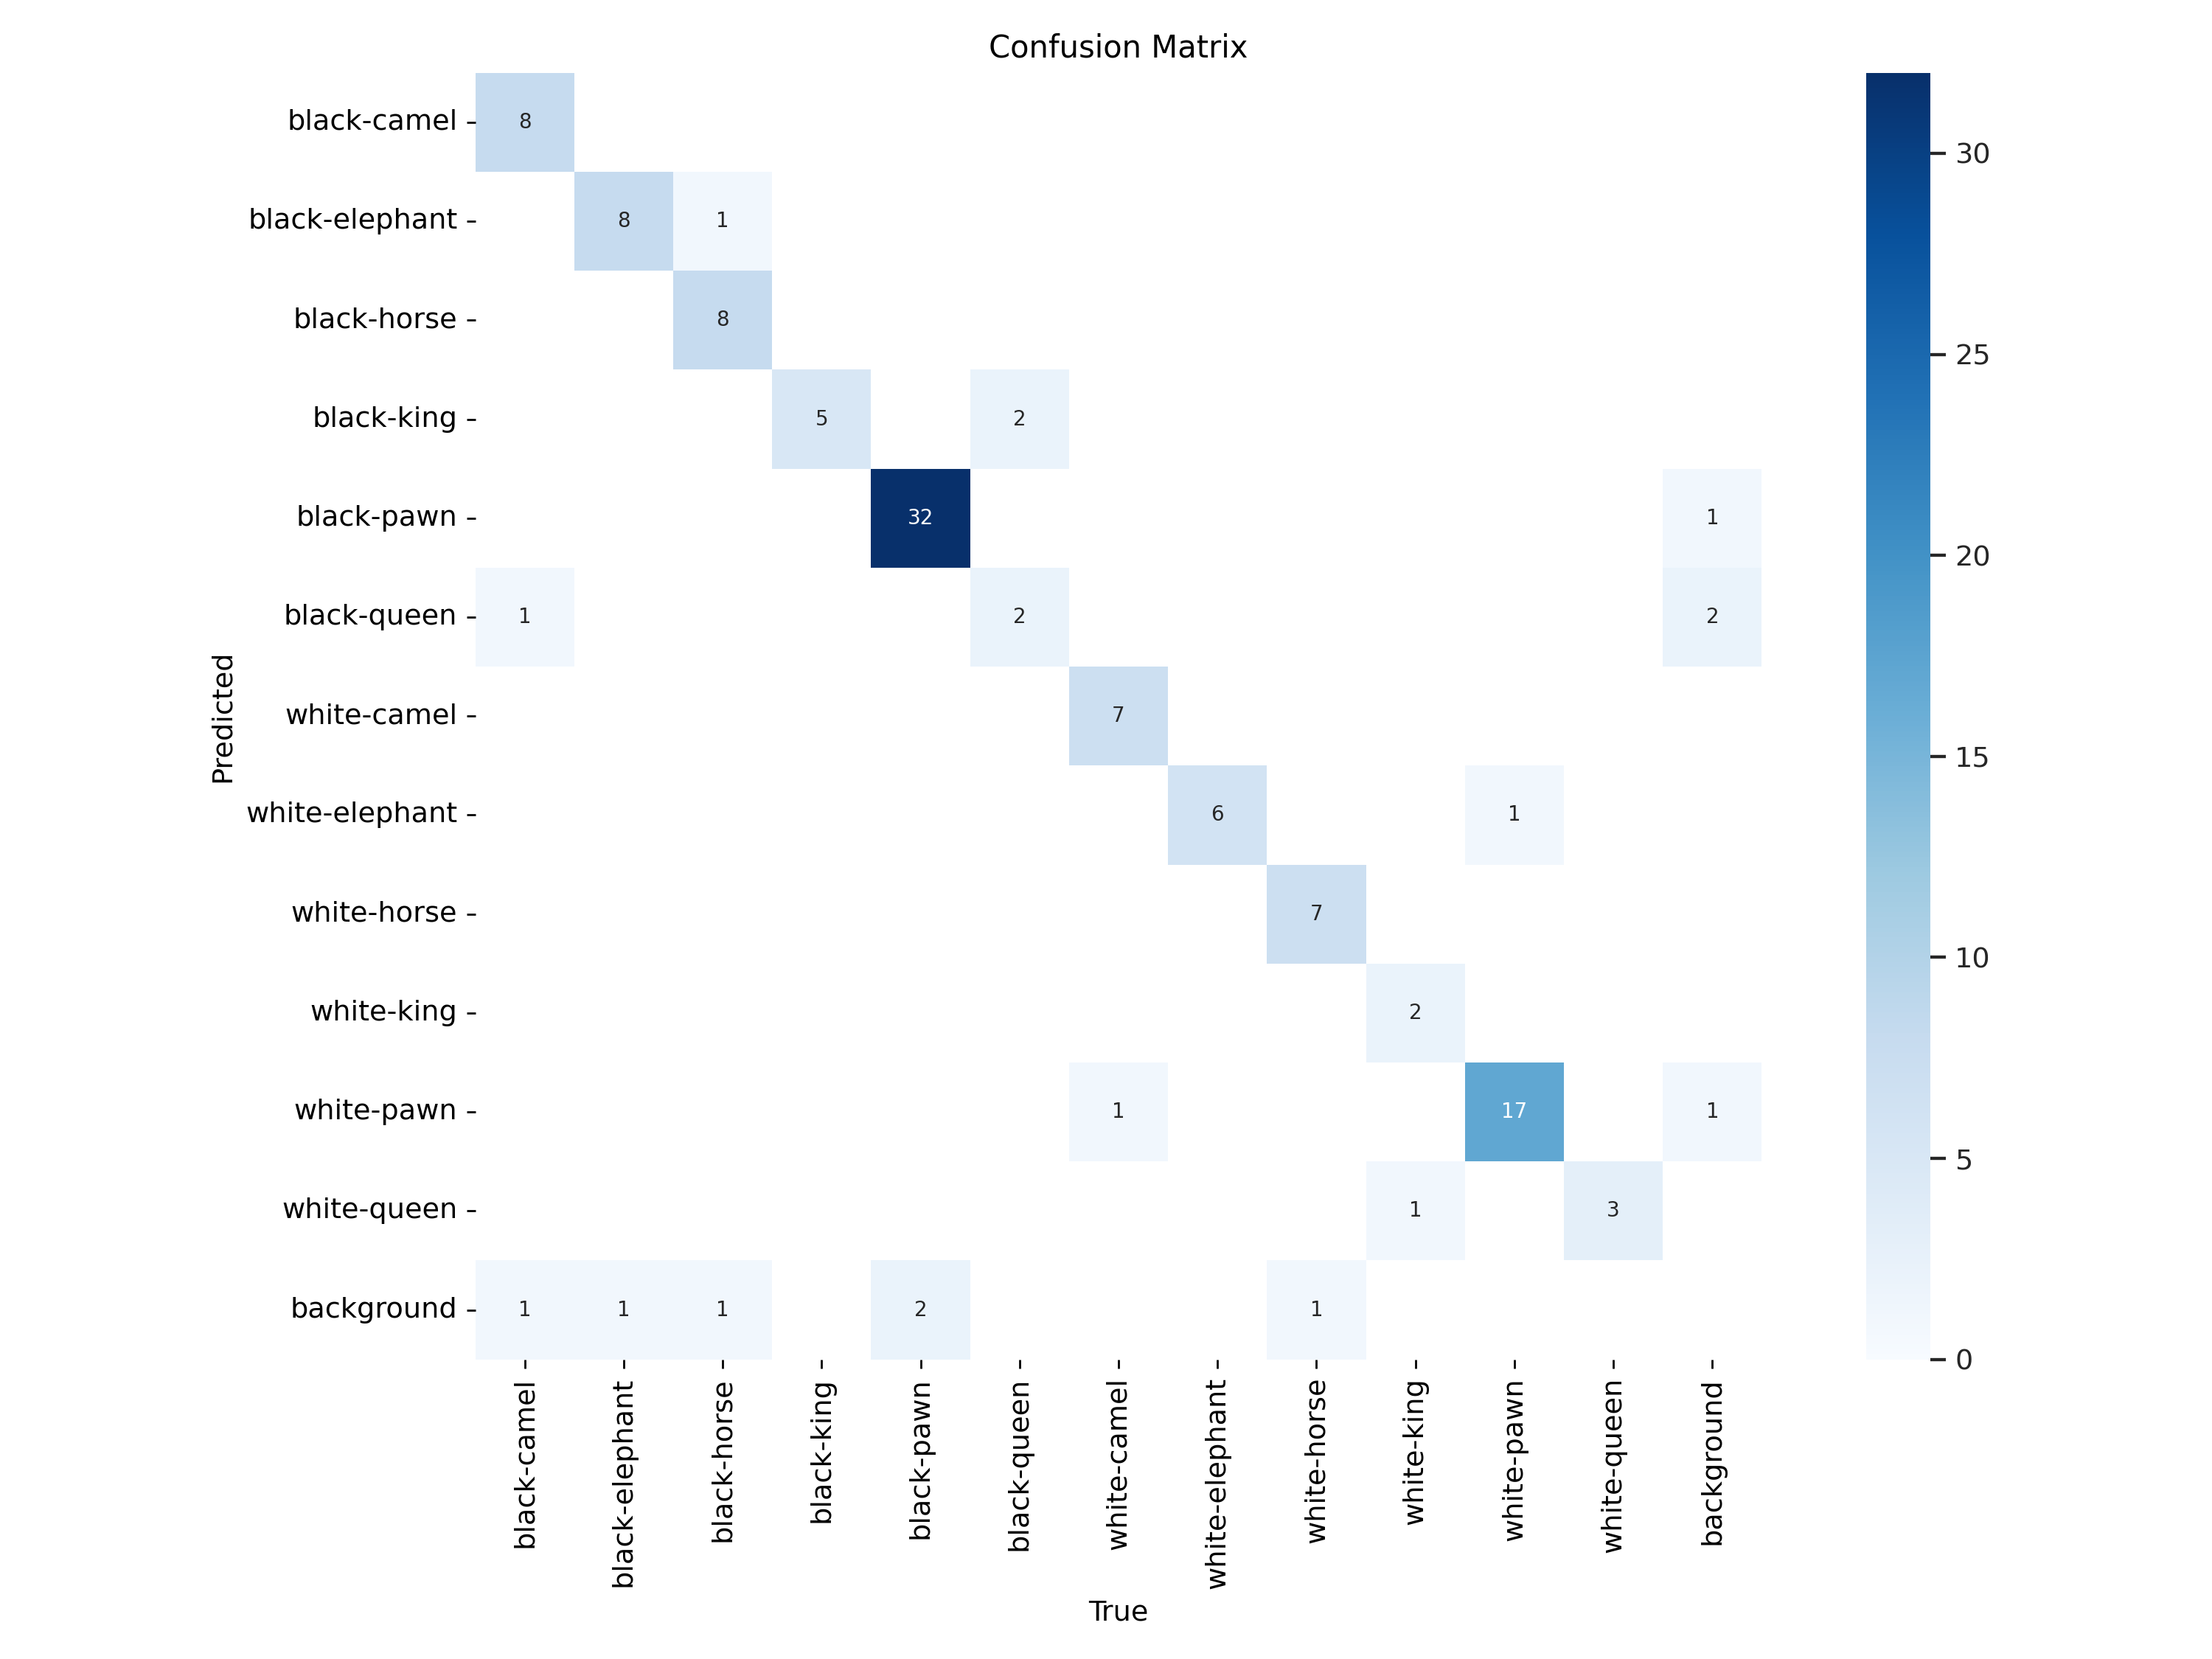

In [15]:
# Confusion matrix
from IPython.display import display,Image
Image(filename="/content/runs/detect/train/confusion_matrix.png",width=600)

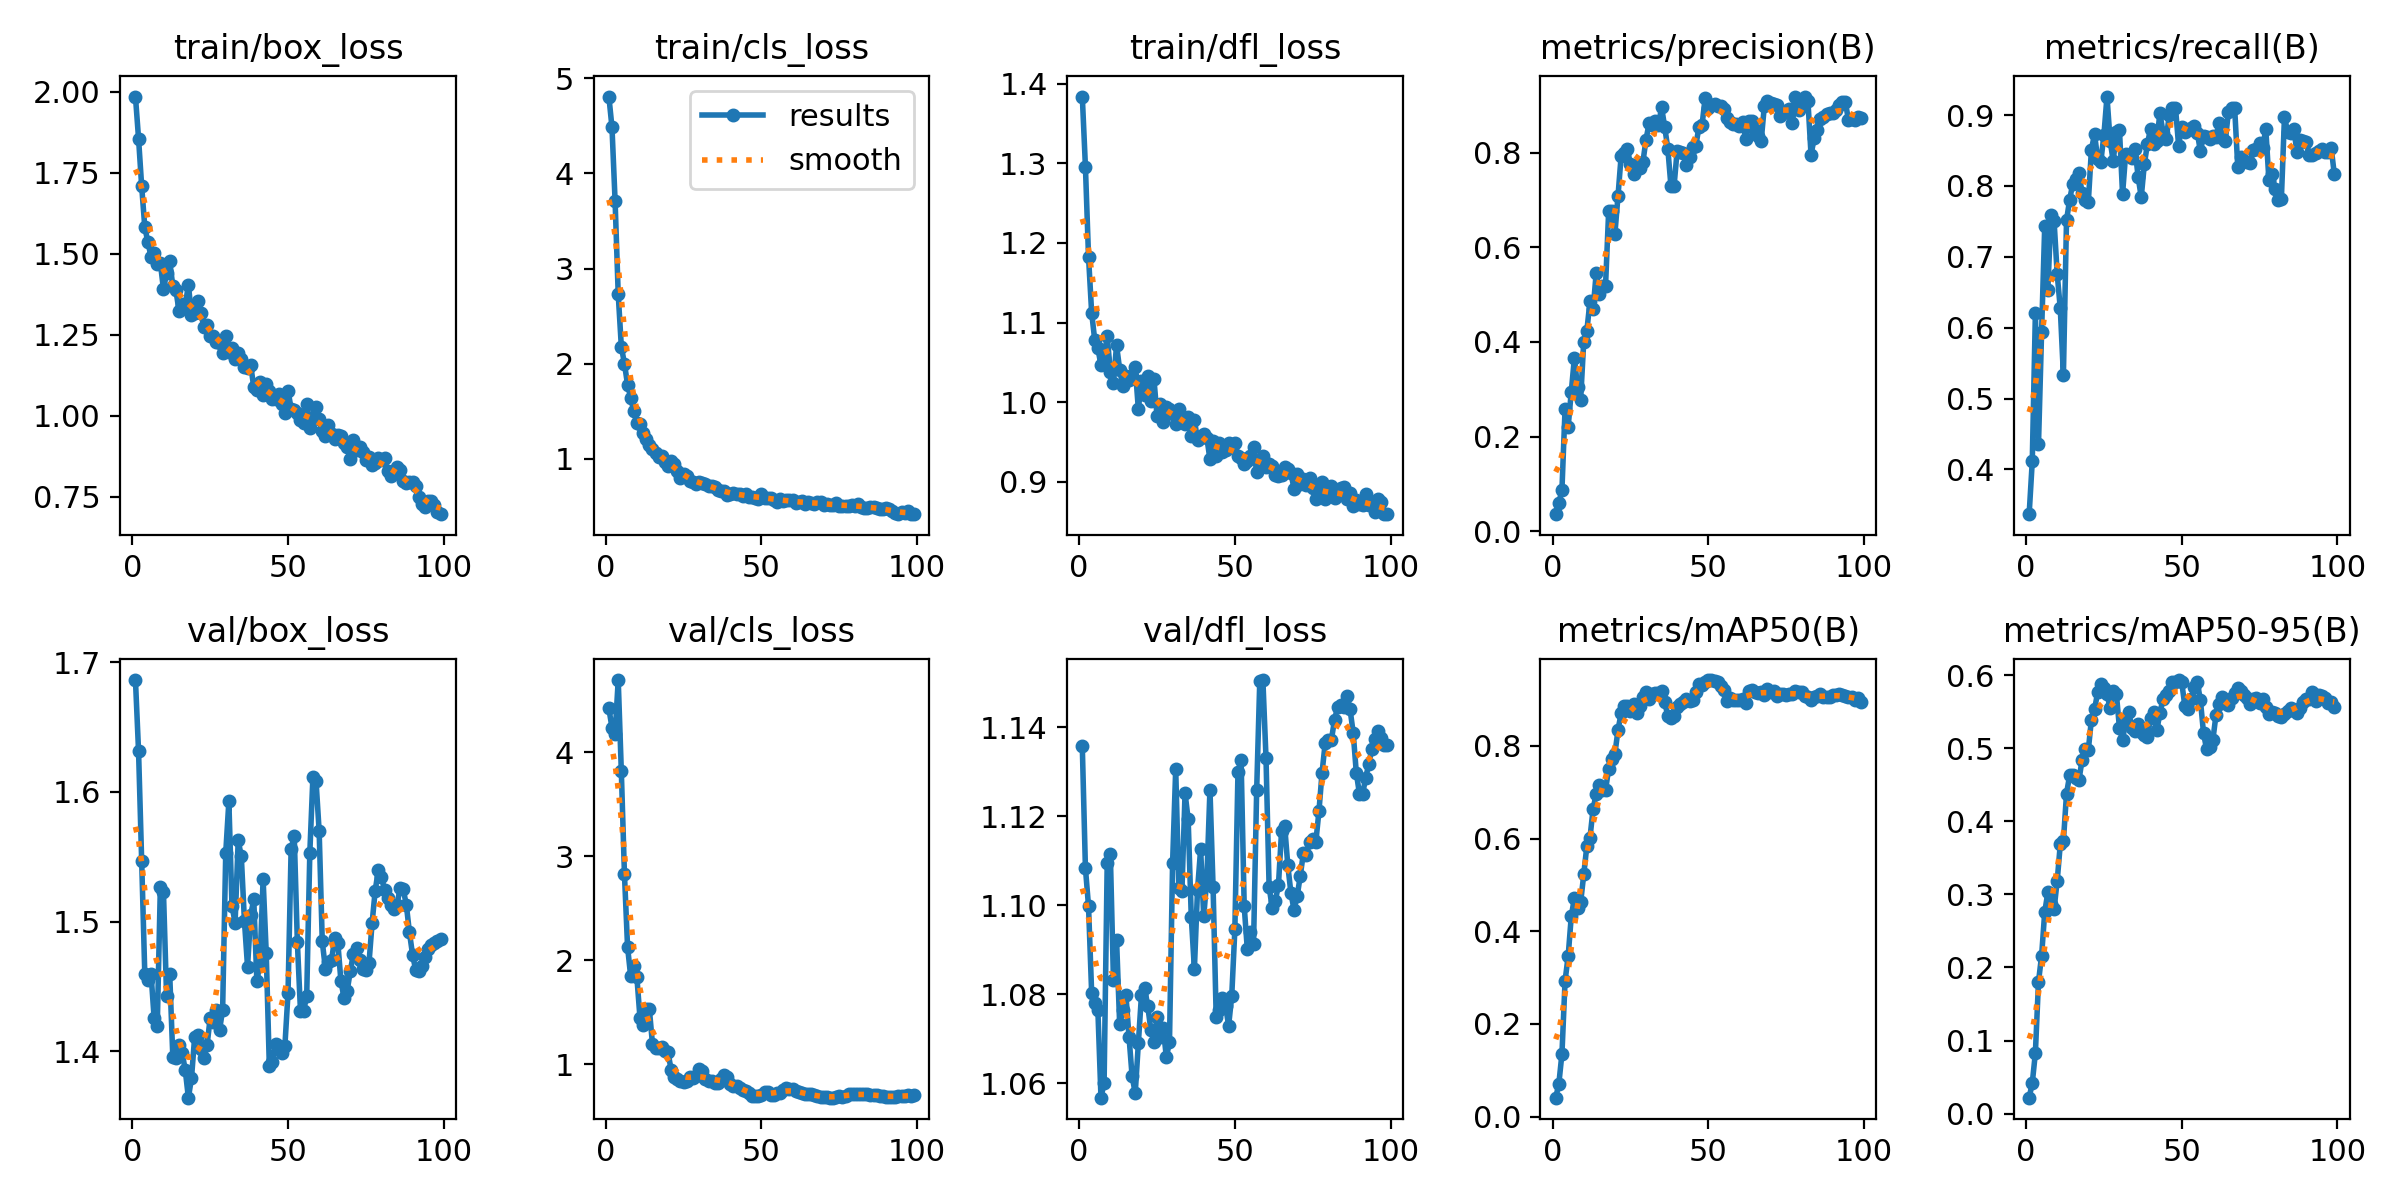

In [17]:
Image(filename="/content/runs/detect/train/results.png")

Predicted Image 1

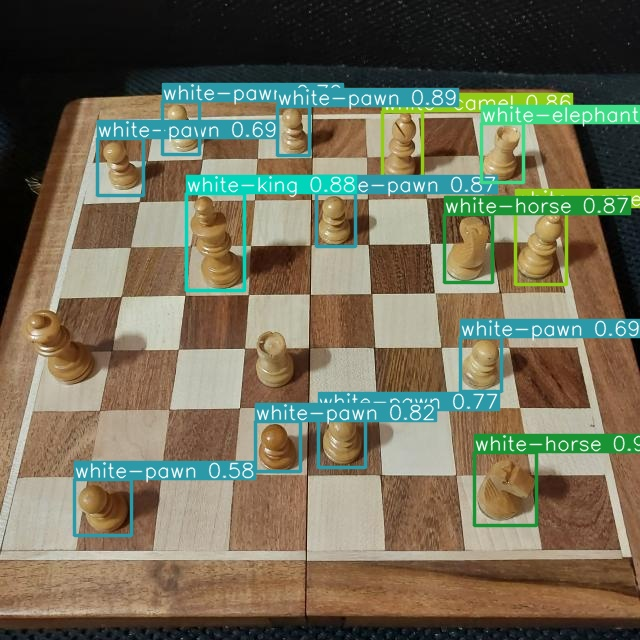

In [18]:
Image(filename="/content/runs/detect/predict2/20230315_193509_jpg.rf.6a788bb87d85fc2661fdec5a6f4c0a6b.jpg",width=1000)

Predicted Image 2

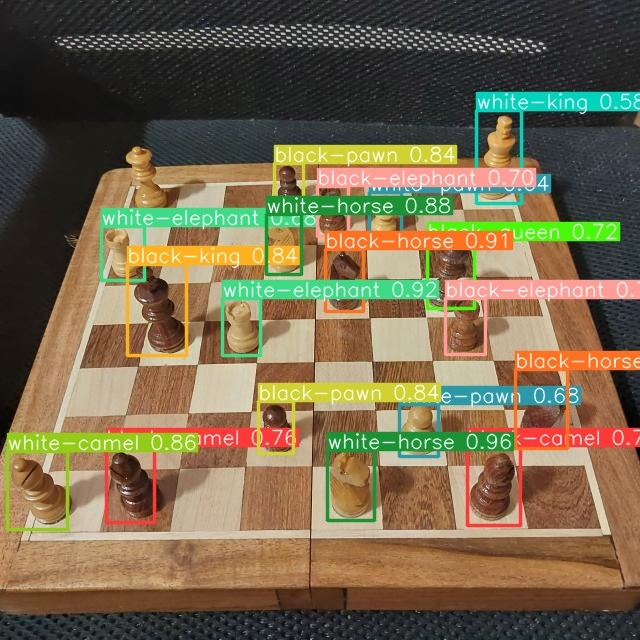

In [19]:
Image(filename="/content/runs/detect/predict2/20230315_194307_jpg.rf.20dcc57ba2dcfdd1ca6c921cd3fc6c14.jpg",width=1000)